In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data=pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\MeriSkill\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#There are no null values.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Class distribution
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
#Split the data into features(independent variables) and the target variable(Outcome)
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [8]:
#Standardize the features to have zero mean and unit variance
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [9]:
#Split the data into Training and Testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#random forest classifier
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [11]:
#Predictions
y_pred=clf.predict(X_test)

In [12]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

report=classification_report(y_test,y_pred)
print("Classification Report:\n",report)

confusion=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion)

Accuracy: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[78 21]
 [21 34]]


In [13]:
from sklearn.inspection import plot_partial_dependence
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

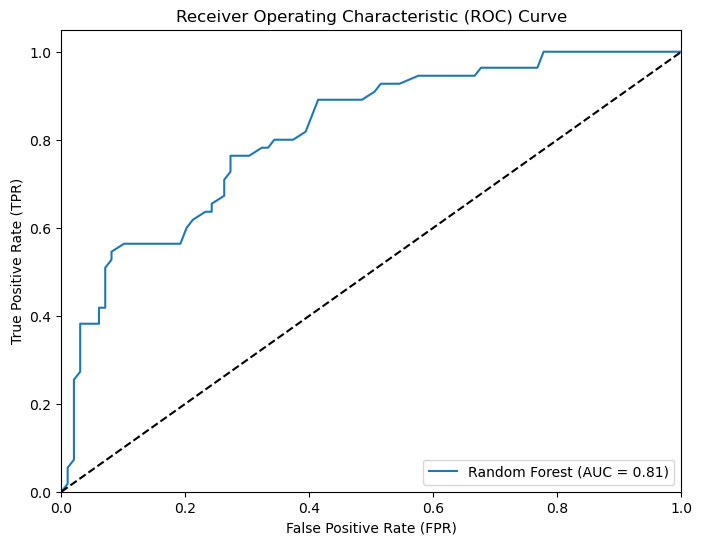

In [14]:
#ROC Curve

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

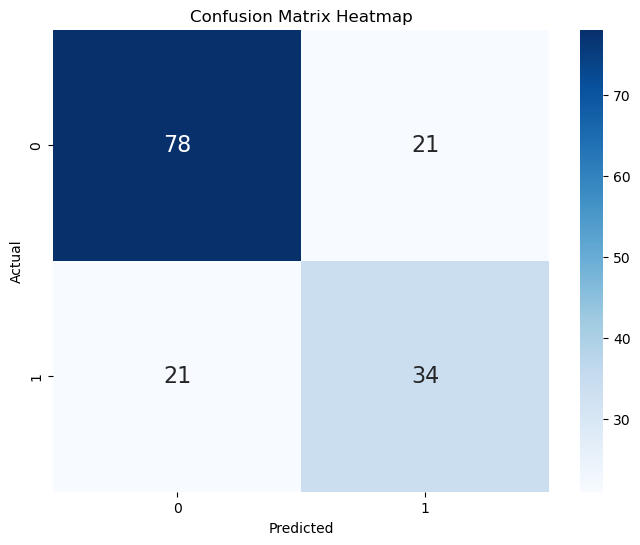

In [15]:
#Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

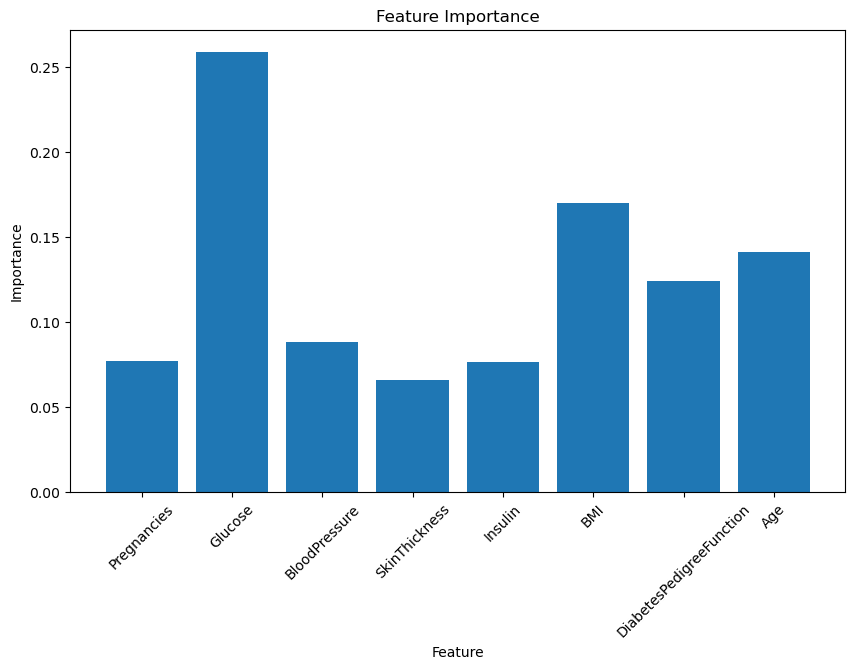

In [16]:
#Feature Importance
plt.figure(figsize=(10, 6))
feat_importances = clf.feature_importances_
feat_names = data.columns[:-1]
plt.bar(feat_names, feat_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

#This shows that Glucose and BMI play a critical role in making Diabetes prediction while Skin thickness,Pregnancies and insulin are less influential to this prediction.